In [92]:
from sklearn import svm
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np

In [93]:
#读取数据
filename = 'data1.mat'
data = loadmat(filename)
#print(data)
data_x = data['X']
data_y = data['y']
print(data_x.shape,data_y.shape)
data = np.concatenate((data_y,data_x),axis=1)
#print(data)

(51, 2) (51, 1)


In [94]:
#数据集划分
data_train, data_test = train_test_split(data, test_size=0.3, random_state=66)
train_y = data_train[:,0]
train_x = data_train[:,1:]
test_y = data_test[:,0]
test_x = data_test[:,1:]
print(train_y.shape,train_x.shape)
print(test_y.shape,test_x.shape)

(35,) (35, 2)
(16,) (16, 2)


In [95]:
#模型训练
SVM1 = svm.LinearSVC(loss='squared_hinge',random_state=0)
SVM1.fit(train_x,train_y)
SVM1.score(test_x,test_y)

0.9375

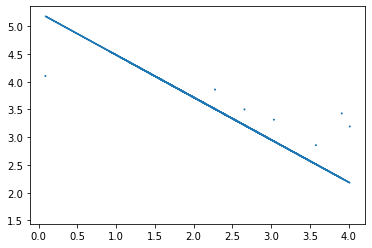

In [96]:
#可视化
a1,a2 = SVM1.coef_[0]
b = SVM1.intercept_[0]
plt.scatter(test_x[:,0],test_x[:,1],test_y.flatten())
plt.plot(test_x[:,0],-a1/a2*test_x[:,0] - b/a2)

In [97]:
#C分析
C=[0.0001,0.001,0.01,1,10,100,1000,10000]
for i in range(8):
    SVM1 = svm.LinearSVC(loss='squared_hinge',C=C[i],random_state=0,dual=False)
    SVM1.fit(train_x,train_y)
    print(C[i],SVM1.score(test_x,test_y))


0.0001 0.75
0.001 0.75
0.01 0.8125
1 0.9375
10 0.9375
100 0.9375
1000 0.9375
10000 0.9375


In [98]:
#非线性SVM
#读取数据
filename = 'data2.mat'
data = loadmat(filename)
#print(data)
data_x = data['X']
data_y = data['y']
print(data_x.shape,data_y.shape)
data = np.concatenate((data_y,data_x),axis=1)
#print(data)

(863, 2) (863, 1)


In [99]:
#数据集划分
data_train, data_test = train_test_split(data, test_size=0.3, random_state=66)
train_y = data_train[:,0]
train_x = data_train[:,1:]
test_y = data_test[:,0]
test_x = data_test[:,1:]
print(train_y.shape,train_x.shape)
print(test_y.shape,test_x.shape)

(604,) (604, 2)
(259,) (259, 2)


In [100]:
#模型训练
SVM2 = svm.SVC( kernel='rbf')
SVM2.fit(train_x,train_y)
SVM2.score(test_x,test_y)

0.8532818532818532

In [101]:
#分析
#kernel='linear'
SVM3 = svm.SVC(kernel='linear')
SVM3.fit(train_x,train_y)
SVM3.score(test_x,test_y)

0.5366795366795367

In [102]:
#kernel='poly'
SVM4 = svm.SVC(kernel='poly')
SVM4.fit(train_x,train_y)
SVM4.score(test_x,test_y)

0.7065637065637066

In [103]:
#kernel='sigmoid'
SVM5 = svm.SVC(kernel='sigmoid')
SVM5.fit(train_x,train_y)
SVM5.score(test_x,test_y)

0.5444015444015444

In [104]:
#kernel='precomputed'
#输入阵必须是方正，不可用

In [105]:
#Bonus
#读取数据
filename = 'data3.mat'
data = loadmat(filename)
#print(data)
data_x = data['X']
data_y = data['y']
print(data_x.shape,data_y.shape)
data = np.concatenate((data_y,data_x),axis=1)
#print(data)

(211, 2) (211, 1)


In [106]:
#数据集划分
data_train, data_test = train_test_split(data, test_size=0.3, random_state=66)
train_y = data_train[:,0]
train_x = data_train[:,1:]
test_y = data_test[:,0]
test_x = data_test[:,1:]
print(train_y.shape,train_x.shape)
print(test_y.shape,test_x.shape)

(147,) (147, 2)
(64,) (64, 2)


In [107]:
#data3模型训练
SVM_1 = svm.LinearSVC(loss='squared_hinge',random_state=0)
SVM_1.fit(train_x,train_y)
SVM_1.score(test_x,test_y)

0.953125

In [108]:
SVM_2 = svm.SVC( kernel='rbf')
SVM_2.fit(train_x,train_y)
SVM_2.score(test_x,test_y)

0.953125

In [109]:
SVM_3 = svm.SVC(kernel='linear')
SVM_3.fit(train_x,train_y)
SVM_3.score(test_x,test_y)

0.921875

In [110]:
SVM_4 = svm.SVC(kernel='poly')
SVM_4.fit(train_x,train_y)
SVM_4.score(test_x,test_y)

0.84375

In [111]:
SVM_5 = svm.SVC(kernel='sigmoid')
SVM_5.fit(train_x,train_y)
SVM_5.score(test_x,test_y)

0.859375

In [112]:
#归一化
maxnum = np.max(data_train,0,keepdims=True)
minnum = np.min(data_train,0,keepdims=True)
data_train = (data_train -minnum)/(maxnum -minnum)
data_test = (data_test -minnum)/(maxnum -minnum)
train_y = data_train[:,0]
train_x = data_train[:,1:]
test_y = data_test[:,0]
test_x = data_test[:,1:]

In [113]:
#LinearSVC
c = [0.0001,0.001,0.01,1,10,100,1000]
for  i in range(7):
    LSVM = svm.LinearSVC(loss='squared_hinge',C=c[i],random_state=0,dual=False)
    LSVM.fit(train_x,train_y)
    print(c[i],LSVM.score(test_x,test_y))

0.0001 0.625
0.001 0.71875
0.01 0.9375
1 0.96875
10 0.96875
100 0.96875
1000 0.96875


In [114]:
#SVC,kernel='rbf'
g = [0.1,0.2,0.3]
for i in range(7):
    for j in range(3):
        RSVM = svm.SVC(C=c[i],kernel='rbf',gamma=g[j])
        RSVM.fit(train_x,train_y)
        print(c[i],g[j],RSVM.score(test_x,test_y))

0.0001 0.1 0.46875
0.0001 0.2 0.46875
0.0001 0.3 0.46875
0.001 0.1 0.46875
0.001 0.2 0.46875
0.001 0.3 0.46875
0.01 0.1 0.46875
0.01 0.2 0.46875
0.01 0.3 0.46875
1 0.1 0.953125
1 0.2 0.953125
1 0.3 0.90625
10 0.1 0.9375
10 0.2 0.875
10 0.3 0.921875
100 0.1 0.90625
100 0.2 0.921875
100 0.3 0.890625
1000 0.1 0.890625
1000 0.2 0.890625
1000 0.3 0.921875
